<a href="https://colab.research.google.com/github/Breniah/HW_5/blob/main/sentiment_analysis_BreniahS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
from numpy import argmax
from nltk.corpus import stopwords
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.utils import shuffle
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from textblob import TextBlob
import csv
from IPython.display import display, HTML
import wordcloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('customer_reviewers.tsv', sep='\t')
#sep means removes spaces between output
#printing the first ten rows of the data
print(data.head(10))

   rating       date             variation  \
0       5  31-Jul-18      Charcoal Fabric    
1       5  31-Jul-18      Charcoal Fabric    
2       4  31-Jul-18        Walnut Finish    
3       5  31-Jul-18      Charcoal Fabric    
4       5  31-Jul-18      Charcoal Fabric    
5       5  31-Jul-18  Heather Gray Fabric    
6       3  31-Jul-18     Sandstone Fabric    
7       5  31-Jul-18      Charcoal Fabric    
8       5  30-Jul-18  Heather Gray Fabric    
9       5  30-Jul-18  Heather Gray Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
5  I received the echo as a gift. I needed anothe...         1  
6  Without having a cellphone, I canno

In [3]:
#Indicating no missing values
data.isnull()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
#removed stopwords
data.columns=["rating", "date", "variation", "verified_reviews", "feedback"]
stopwords_list = set(stopwords.words('english'))
data['verified_reviews'] = data['verified_reviews'].astype(str).apply(lambda word: ' '. join([word for word in word.split() if word not in stopwords_list]))

data.head(11)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes playing game, answer question correc...",1
3,5,31-Jul-18,Charcoal Fabric,"I lot fun thing. My 4 yr old learns dinosaurs,...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received echo gift. I needed another Bluetoo...,1
6,3,31-Jul-18,Sandstone Fabric,"Without cellphone, I cannot use many features....",1
7,5,31-Jul-18,Charcoal Fabric,I think 5th one I've purchased. I'm working ge...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened songs I haven’t heard s...,1


 Love Echo! Loved it! Sometimes playing game, answer question correctly Alexa says got wrong answers you. I like able turn lights away home. I lot fun thing. My 4 yr old learns dinosaurs, control lights play games like categories. Has nice sound playing music well. Music I received echo gift. I needed another Bluetooth something play music easily accessible, found smart speaker. Can’t wait see else do. Without cellphone, I cannot use many features. I iPad see use. It IS great alarm. If u r almost deaf, hear alarm bedroom living room, reason enough keep her.It fun ask random questions hear response. She seem smartbon politics yet. I think 5th one I've purchased. I'm working getting one every room house. I really like features offer specifily playing music Echos controlling lights throughout house. looks great Love it! I’ve listened songs I haven’t heard since childhood! I get news, weather, information! It’s great! I sent 85 year old Dad, talks constantly. I love it! Learning knew thing

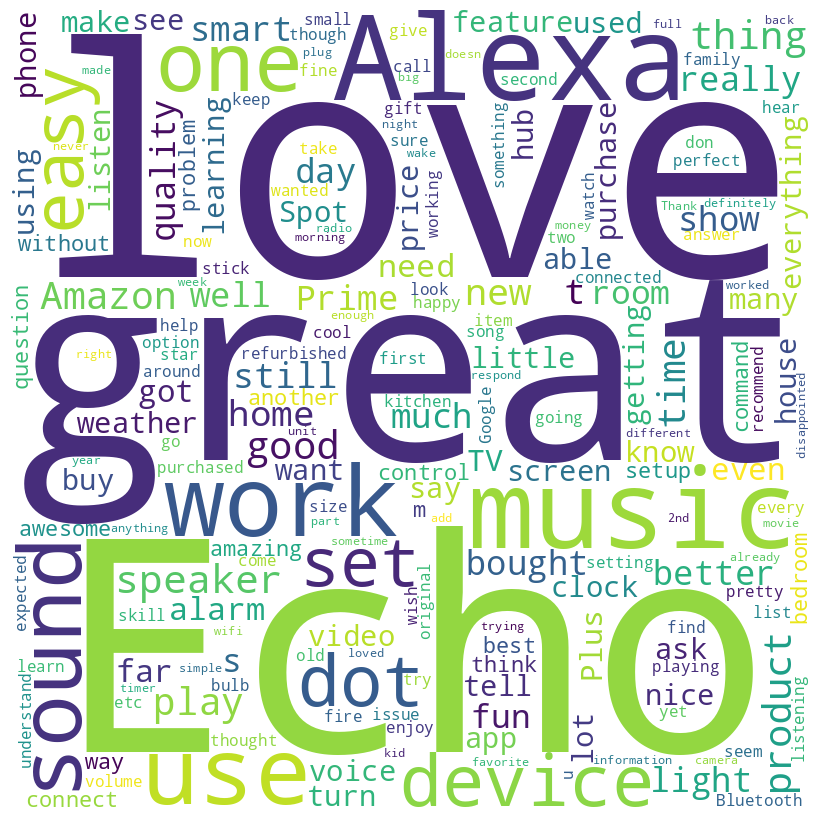

In [6]:
#wordcloud
common_words = ' '

for i in data['verified_reviews']:
  i = str(i)
  word = i.split()
  common_words += ' '.join(word)+" "
print(common_words)

wordcloud = wordcloud.WordCloud(width = 800, height = 800, background_color='white', min_font_size = 10, collocations=False).generate(common_words)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [7]:
html_content = """
<h1 align ="center"> Data Engineering <h1>
"""
display(HTML(html_content))
""

''

In [8]:
#Encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()
data['feedback'] = label_encoder.fit_transform(data['feedback'])

print("Encoded classes:", label_encoder.classes_)
display(data.head())


Encoded classes: [0 1]


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes playing game, answer question correc...",1
3,5,31-Jul-18,Charcoal Fabric,"I lot fun thing. My 4 yr old learns dinosaurs,...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
#Convert the reviews into vector arrays.
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(data['verified_reviews'].values)
X = tokenizer.texts_to_sequences(data['verified_reviews'].values)
X = pad_sequences(X)
#prints the vector arrays
print("Here are the reviews as vector arrays:")
print(X)



Here are the reviews as vector arrays:
[[  0   0   0 ...   0   2   4]
 [  0   0   0 ...   0 211   3]
 [  0   0   0 ...  78 299  25]
 ...
 [  0   0   0 ...  89  51  33]
 [  0   0   0 ... 130 133 127]
 [  0   0   0 ...   0   0  17]]


In [10]:
html_content = """
<h1 align ="center"> Model Design <h1>
"""
display(HTML(html_content))
""

''

In [11]:
#Implementing the Long Short Term Memory
print("X.shape:", X.shape)
input_length = X.shape[1]

model = Sequential()

model.add(Embedding(input_dim=500, output_dim=120, input_length=input_length))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#had to build the model
model.build(input_shape=(None, input_length))
model.summary()


X.shape: (3150, 226)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 226, 120)       │        60,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 226, 120)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 176)            │       209,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,442 (1.03 MB)

 Trainable params: 269,442 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
html_content = """
<h1 align ="center"> Data Splitting <h1>
"""
display(HTML(html_content))
""

''

In [12]:
#Use one hot encoding to transform the labels into categorical format.
y_categorical = to_categorical(data['feedback'], num_classes=2)

#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [13]:
html_content = """
<h1 align ="center"> Training the Model <h1>
"""
display(HTML(html_content))
""

''

In [38]:
#Use the fit funtion to train the design model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),class_weight={0: 15.829145728643217, 1: 1.3571736320551486}, verbose='auto')

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 772ms/step - accuracy: 0.9142 - loss: 0.5380 - val_accuracy: 0.8381 - val_loss: 0.3099
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 769ms/step - accuracy: 0.9141 - loss: 0.4392 - val_accuracy: 0.8635 - val_loss: 0.2726
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 60s 761ms/step - accuracy: 0.9307 - loss: 0.3921 - val_accuracy: 0.9000 - val_loss: 0.2395
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 59s 754ms/step - accuracy: 0.9412 - loss: 0.2847 - val_accuracy: 0.8365 - val_loss: 0.3777
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 83s 767ms/step - accuracy: 0.9338 - loss: 0.3226 - val_accuracy: 0.8492 - val_loss: 0.3619


In [37]:
#oversampleing the negative class
y_train_int = np.argmax(y_train, axis=1)
X_neg = X_train[y_train_int == 0]
X_pos = X_train[y_train_int == 1]
X_neg_over = resample(X_neg, replace=True, n_samples=len(X_pos), random_state=42)


y_neg_over = np.zeros(len(X_neg_over))
y_pos = np.ones(len(X_pos))
X_balanced = np.vstack([X_pos, X_neg_over])
y_balanced = np.concatenate([y_pos, y_neg_over])

X_balanced, y_balanced = shuffle(X_balanced, y_balanced, random_state=42)

y_balanced = to_categorical(y_balanced, num_classes=2)


In [36]:
#training the model using class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

class_weights = {i: float(class_weights[i] * 2.5) for i in range(len(class_weights))}
print("boosted class weights:", class_weights)


boosted class weights: {0: 15.829145728643217, 1: 1.3571736320551486}


In [17]:
html_content = """
<h1 align ="center"> Evaluate your Model <h1>
"""
display(HTML(html_content))
""

''

In [18]:
#Use a function predict to evaluate the performance of you model using the testing dataset
predictions = model.predict(X_test)
#used argmax funtion to transform the predicted labels
argmax_predictions = np.argmax(predictions, axis=1)
accuracy = np.mean(argmax_predictions == np.argmax(y_test, axis=1))
print("Accuracy:", accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step
Accuracy: 0.8825396825396825


In [19]:
html_content = """
<h1 align ="center"> Performed Evaluation <h1>
"""
display(HTML(html_content))
""

''

In [20]:
#Print the table with the corresponding metric evaluation: precision, recall, f1-score, support, accuracy, macro avg, and weighted avg
print(classification_report(np.argmax(y_test, axis=1), argmax_predictions))

              precision    recall  f1-score   support

           0       0.42      0.72      0.53        58
           1       0.97      0.90      0.93       572

    accuracy                           0.88       630
   macro avg       0.69      0.81      0.73       630
weighted avg       0.92      0.88      0.90       630



In [21]:
html_content = """
<h1 align ="center"> Client Program <h1>
"""
display(HTML(html_content))
""

''

In [50]:
#create a function that removes stop words from the review
def clean_review(text, stopwords_list):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return ' '.join(filtered_words)
#convert clean review to vector
def vectorize_review(review, tokenizer):
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=X.shape[1])
    return padded_sequence
#predicting the customer review sentiment and print the predicted sentiment
def predict_sentiment(review, tokenizer, model, stopwords_list):
    cleaned_review = clean_review(review, stopwords_list)
    vectorized_review = vectorize_review(cleaned_review, tokenizer)
    predictions = model.predict(vectorized_review)
    predicted_class = np.argmax(predictions)
    sentiment = "positive" if predicted_class == 1 else "negative"
    return sentiment

#asking the customer for their review
user_review = input("Please enter your review for the echo: ")

# Call the predict_sentiment function
sentiment = predict_sentiment(user_review, tokenizer, model, stopwords_list)

#printing sentiment

print("The sentiment of the review is:", sentiment)



Please enter your review for the echo: amazing product
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
The sentiment of the review is: positive
